In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

Feature selection from Bag-of-Words features of Movie node

In [3]:
# Feature selection for Movie class 0
class0 = df[df['class'] == 0].drop(['class'], axis=1)
class0.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Feature selection for Movie class 1
class1 = df[df['class'] == 1].drop(['class'], axis=1)
class1.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Feature selection for Movie class 2
class2 = df[df['class'] == 2].drop(['class'], axis=1)
class2.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [6]:
class_path = '../../../../../../graph generator/diffusion models/sampled_features_diffusion/dependence/DiTabDDPM/imdb/frequency/'

In [7]:
sampled0  = pd.DataFrame(torch.load(class_path + 'movie0_3066feat.pt').cpu().numpy())
sampled0.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,5,0,0,0,5,0,2,0,5,0,...,2,5,5,0,2,5,0,5,5,0
1,0,0,0,1,2,2,4,4,0,5,...,0,3,0,5,5,4,0,3,0,0
2,0,5,0,3,0,0,5,5,4,5,...,0,0,3,3,0,4,4,3,5,3
3,0,5,5,0,3,0,0,5,0,0,...,3,5,0,5,5,4,4,5,1,3
4,0,5,5,0,0,0,1,0,0,5,...,4,3,0,5,2,0,0,0,0,4


In [8]:
sampled1  = pd.DataFrame(torch.load(class_path + 'movie1_3066feat.pt').cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,0,4,3,0,0,5,0,3,4,2,...,0,4,3,3,0,0,0,0,2,1
1,4,3,0,0,5,2,0,0,3,5,...,3,0,4,4,4,0,0,0,0,0
2,4,5,5,0,4,5,0,0,3,0,...,0,1,3,0,0,4,0,5,0,0
3,2,3,0,0,3,5,4,0,0,5,...,1,5,3,0,0,2,0,0,0,3
4,5,0,5,3,0,0,4,0,4,0,...,5,0,0,5,5,3,5,0,1,3


In [9]:
sampled2  = pd.DataFrame(torch.load(class_path + 'movie2_3066feat.pt').cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,3,0,5,0,0,0,3,2,0,0,...,4,4,0,0,0,0,4,0,0,3
1,0,0,0,0,0,0,5,0,0,5,...,0,5,0,4,0,0,0,0,3,4
2,0,0,4,0,0,0,0,1,5,4,...,0,0,0,5,0,0,0,1,4,0
3,0,0,0,1,0,2,4,3,0,0,...,0,4,3,0,3,4,0,0,3,3
4,0,3,3,0,4,5,5,5,0,0,...,0,3,3,4,0,0,0,3,0,0


In [10]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [11]:
cosine_sim(class0,sampled0)

array([[0.02290323, 0.00661165, 0.01697697, ..., 0.01337082, 0.03687291,
        0.03389071],
       [0.0185086 , 0.02805086, 0.03121179, ..., 0.0094546 , 0.00948112,
        0.03834296],
       [0.03511761, 0.0147841 , 0.0182216 , ..., 0.00896942, 0.04497291,
        0.04243788],
       ...,
       [0.02762233, 0.05581766, 0.0470925 , ..., 0.06450328, 0.04447041,
        0.03269899],
       [0.01236658, 0.04248248, 0.01283339, ..., 0.04801012, 0.02027149,
        0.01793328],
       [0.03804407, 0.0147841 , 0.02125853, ..., 0.01494904, 0.02698375,
        0.0272815 ]])

<AxesSubplot:>

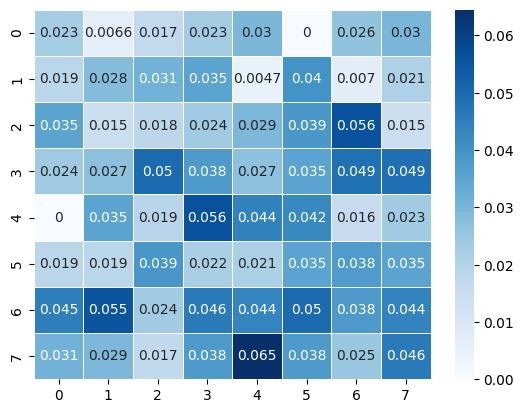

In [12]:
sns.heatmap(cosine_sim(class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [13]:
avg_cossim_class0 = np.mean(cosine_sim(class0,sampled0))
avg_cossim_class0

0.029714444056714473

Movie class 1

In [14]:
cosine_sim(class1,sampled1)

array([[0.02664418, 0.03034144, 0.04626235, ..., 0.05479729, 0.02897271,
        0.04256988],
       [0.01510583, 0.03686138, 0.02248139, ..., 0.04225132, 0.02527074,
        0.03048613],
       [0.03791533, 0.01028015, 0.04597824, ..., 0.02703234, 0.04651464,
        0.05738968],
       ...,
       [0.02991296, 0.04777781, 0.0323769 , ..., 0.02416057, 0.        ,
        0.05213724],
       [0.03263232, 0.02919755, 0.01618845, ..., 0.03489861, 0.02456597,
        0.03841691],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

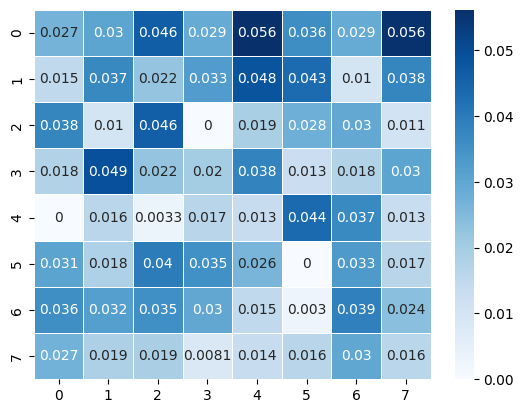

In [15]:
sns.heatmap(cosine_sim(class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [16]:
avg_cossim_class1 = np.mean(cosine_sim(class1,sampled1))
avg_cossim_class1

0.029298247332293713

Movie class 2

In [17]:
cosine_sim(class2,sampled2)

array([[0.03016897, 0.03294388, 0.03870351, ..., 0.03242948, 0.02665862,
        0.03234874],
       [0.04054613, 0.05919187, 0.0211831 , ..., 0.03962198, 0.02810066,
        0.02557393],
       [0.01192533, 0.02130907, 0.05413458, ..., 0.06759044, 0.04683443,
        0.02324903],
       ...,
       [0.06296254, 0.04910983, 0.02884789, ..., 0.02636891, 0.03532474,
        0.03068715],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<AxesSubplot:>

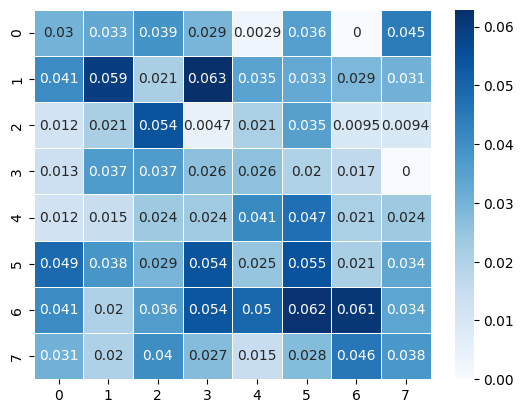

In [18]:
sns.heatmap(cosine_sim(class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)

In [19]:
avg_cossim_class2 = np.mean(cosine_sim(class2,sampled2))
avg_cossim_class2

0.028550245107806554

In [20]:
(avg_cossim_class0 + avg_cossim_class1 +avg_cossim_class2)/3

0.029187645498938247